# Primer Punto

## 1. a

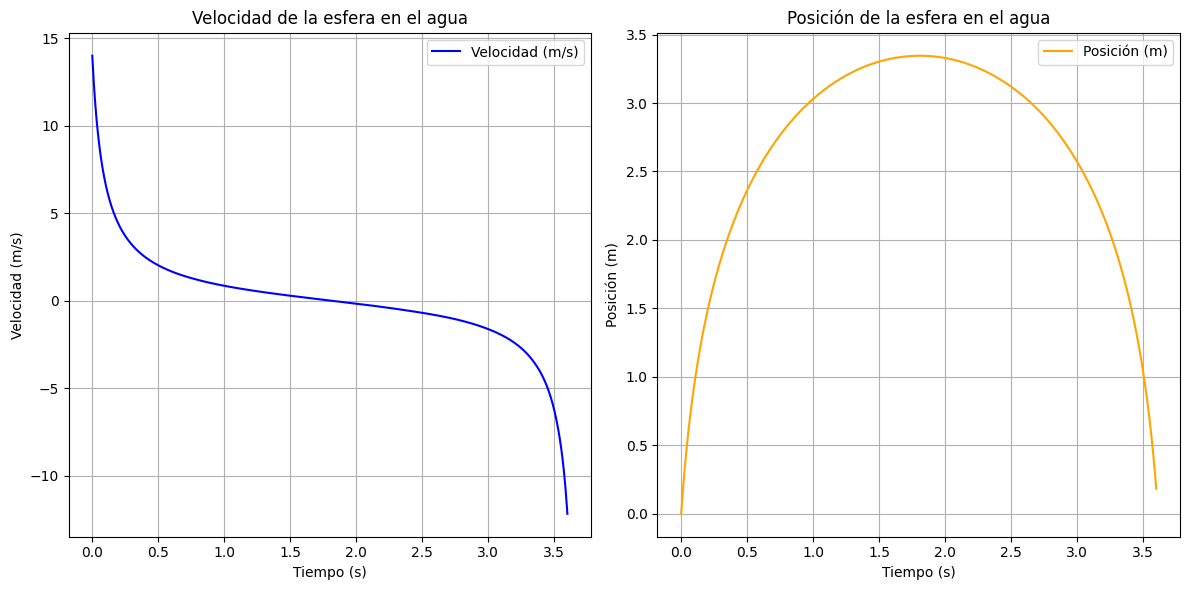

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros del problema
m = 60  # Masa de la esfera (kg)
r = 0.25  # Radio de la esfera (m)
g = 9.81  # Aceleración debida a la gravedad (m/s^2)
rho_agua = 1000  # Densidad del agua (kg/m^3)
Cd = 0.47  # Coeficiente de arrastre para una esfera

# Constantes precalculadas
A = np.pi * r**2  # Área frontal de la esfera (m^2)
V_desplazado = (4/3) * np.pi * r**3  # Volumen desplazado por la esfera (m^3)
F_empuje = rho_agua * g * V_desplazado  # Empuje (N)
F_peso = m * g  # Peso de la esfera (N)

# Función para calcular las fuerzas
def calcular_fuerzas(v):
    F_arrastre = 0.5 * Cd * rho_agua * A * v**2  # Resistencia del agua (arrastre)
    return F_arrastre

# Sistema de ecuaciones diferenciales
def sistema_ecuaciones(t, y):
    v, x = y  # Velocidad y posición

    # Calcular fuerzas
    F_arrastre = calcular_fuerzas(v)

    # Ecuación para la velocidad (dv/dt)
    dvdt = (-F_empuje + F_peso - F_arrastre) / m

    # Ecuación para la posición (dx/dt)
    dxdt = v

    return [dvdt, dxdt]

# Condiciones iniciales
v0 = 14  # Velocidad inicial (m/s)
x0 = 0   # Posición inicial (m)

# Intervalo de tiempo de simulación
t_span = (0, 3.6)  # Desde 0 a 3.6 segundos
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # Puntos de tiempo para la evaluación

# Resolver el sistema de ecuaciones diferenciales
sol = solve_ivp(sistema_ecuaciones, t_span, [v0, x0], t_eval=t_eval)

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Gráfica de la velocidad
plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0], label='Velocidad (m/s)', color='blue')
plt.title('Velocidad de la esfera en el agua')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.grid(True)
plt.legend()

# Gráfica de la posición
plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[1], label='Posición (m)', color='orange')
plt.title('Posición de la esfera en el agua')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## 1. b

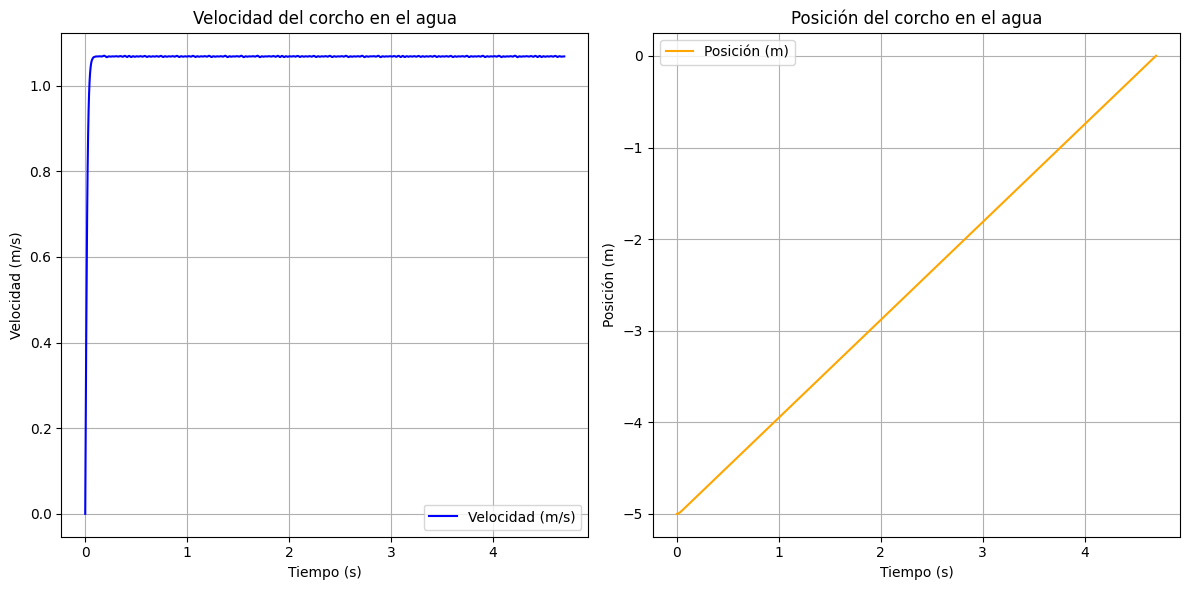

La velocidad con la que el corcho llega a la superficie es: 1.07 m/s


In [79]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parámetros del problema
r = 0.025  # Radio del corcho (m)
rho_agua = 1000  # Densidad del agua (kg/m^3)
rho_corcho = 180  # Densidad del corcho (kg/m^3)
g = 9.81  # Aceleración debida a la gravedad (m/s^2)
Cd = 0.47  # Coeficiente de arrastre para una esfera

# Constantes precalculadas
A = np.pi * r**2  # Área frontal del corcho (m^2)
V_corcho = (4/3) * np.pi * r**3  # Volumen del corcho (m^3)
m = rho_corcho * V_corcho  # Masa del corcho (kg)
F_empuje = rho_agua * g * V_corcho  # Empuje (N)
F_peso = m * g  # Peso del corcho (N)

# Función para calcular la fuerza de arrastre
def calcular_fuerza_arrastre(v):
    return 0.5 * Cd * rho_agua * A * v**2

# Sistema de ecuaciones diferenciales
def sistema_ecuaciones(t, y):
    v, x = y  # Velocidad y posición

    # Calcular fuerza de arrastre
    F_arrastre = calcular_fuerza_arrastre(v)

    # Ecuación para la velocidad (dv/dt)
    dvdt = (F_empuje - F_peso - F_arrastre) / m

    # Ecuación para la posición (dx/dt)
    dxdt = v

    return [dvdt, dxdt]

# Condiciones iniciales
v0 = 0  # Velocidad inicial (m/s)
x0 = -5  # Posición inicial (m)

# Intervalo de tiempo de simulación
t_span = (0, 4.7)  # Desde 0 a 10 segundos
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # Puntos de tiempo para la evaluación

# Resolver el sistema de ecuaciones diferenciales
sol = solve_ivp(sistema_ecuaciones, t_span, [v0, x0], t_eval=t_eval)

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Gráfica de la velocidad
plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0], label='Velocidad (m/s)', color='blue')
plt.title('Velocidad del corcho en el agua')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.grid(True)
plt.legend()

# Gráfica de la posición
plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[1], label='Posición (m)', color='orange')
plt.title('Posición del corcho en el agua')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Velocidad final (cuando llega a la superficie)
velocidad_final = sol.y[0][-1]
print(f"La velocidad con la que el corcho llega a la superficie es: {velocidad_final:.2f} m/s")

## 1. c

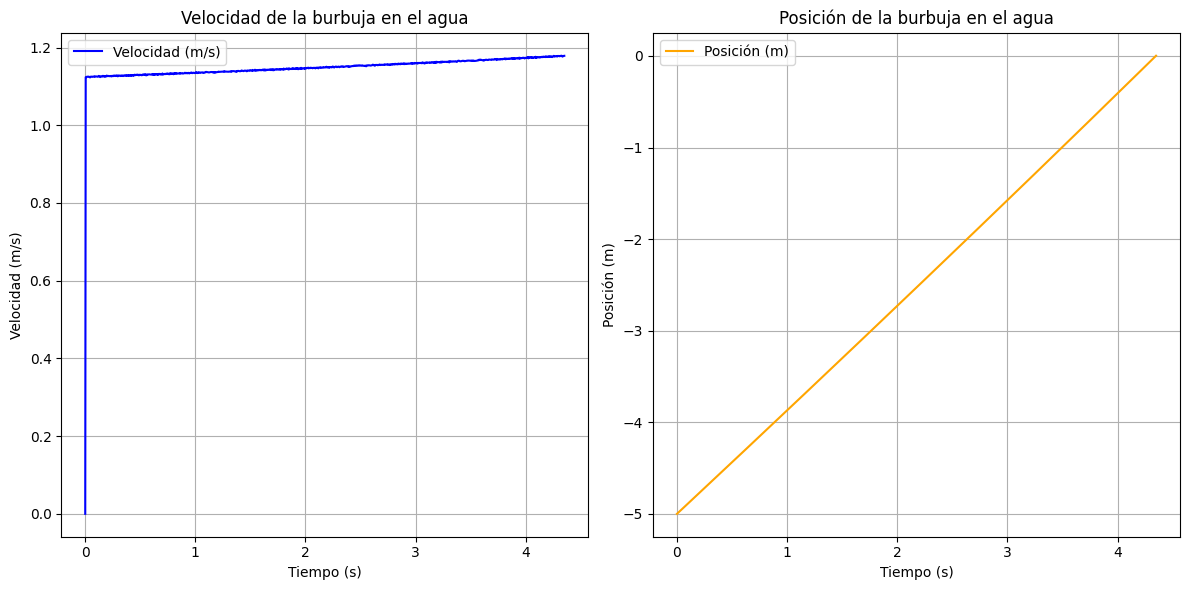

La velocidad con la que la burbuja llega a la superficie es: 1.18 m/s


In [105]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parámetros del problema
r_fondo = 0.025  # Radio de la burbuja en el fondo (m)
rho_agua = 1000  # Densidad del agua (kg/m^3)
rho_aire = 1.225  # Densidad del aire (kg/m^3)
g = 9.81  # Aceleración debida a la gravedad (m/s^2)
Cd = 0.47  # Coeficiente de arrastre para una esfera
P_fondo = 101325 + rho_agua * g * 5  # Presión en el fondo (Pa)
P_superficie = 101325  # Presión en la superficie (Pa)

# Constantes precalculadas
V_fondo = (4/3) * np.pi * r_fondo**3  # Volumen de la burbuja en el fondo (m^3)
m_gas = rho_aire * V_fondo  # Masa del gas (kg)

# Función para calcular la fuerza de arrastre
def calcular_fuerza_arrastre(v, A):
    return 0.5 * Cd * rho_agua * A * v**2

# Sistema de ecuaciones diferenciales
def sistema_ecuaciones(t, y):
    v, x = y  # Velocidad y posición

    # Calcular el volumen de la burbuja en función de la profundidad
    P_actual = P_fondo - rho_agua * g * x  # Presión a la profundidad x
    V_actual = (V_fondo * P_fondo) / P_actual  # Volumen a la profundidad x

    # El radio de la burbuja cambia conforme al volumen
    r_actual = (3 * V_actual / (4 * np.pi))**(1/3)

    # El área frontal también cambia con el radio
    A_actual = np.pi * r_actual**2

    # Calcular fuerzas
    F_empuje = rho_agua * V_actual * g
    F_peso = m_gas * g
    F_arrastre = calcular_fuerza_arrastre(v, A_actual)

    # Ecuación para la velocidad (dv/dt)
    dvdt = (F_empuje - F_peso - F_arrastre) / m_gas

    # Ecuación para la posición (dx/dt)
    dxdt = v

    return [dvdt, dxdt]

# Condiciones iniciales
v0 = 0  # Velocidad inicial (m/s)
x0 = -5  # Posición inicial (m)

# Intervalo de tiempo de simulación
t_span = (0, 4.35)  # Desde 0 a 4.35 segundos (ajustar según el caso)
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # Puntos de tiempo para la evaluación

# Resolver el sistema de ecuaciones diferenciales
sol = solve_ivp(sistema_ecuaciones, t_span, [v0, x0], t_eval=t_eval)

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Gráfica de la velocidad
plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0], label='Velocidad (m/s)', color='blue')
plt.title('Velocidad de la burbuja en el agua')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.grid(True)
plt.legend()

# Gráfica de la posición
plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[1], label='Posición (m)', color='orange')
plt.title('Posición de la burbuja en el agua')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Velocidad final (cuando llega a la superficie)
velocidad_final = sol.y[0][-1]
print(f"La velocidad con la que la burbuja llega a la superficie es: {velocidad_final:.2f} m/s")


# Segundo Punto

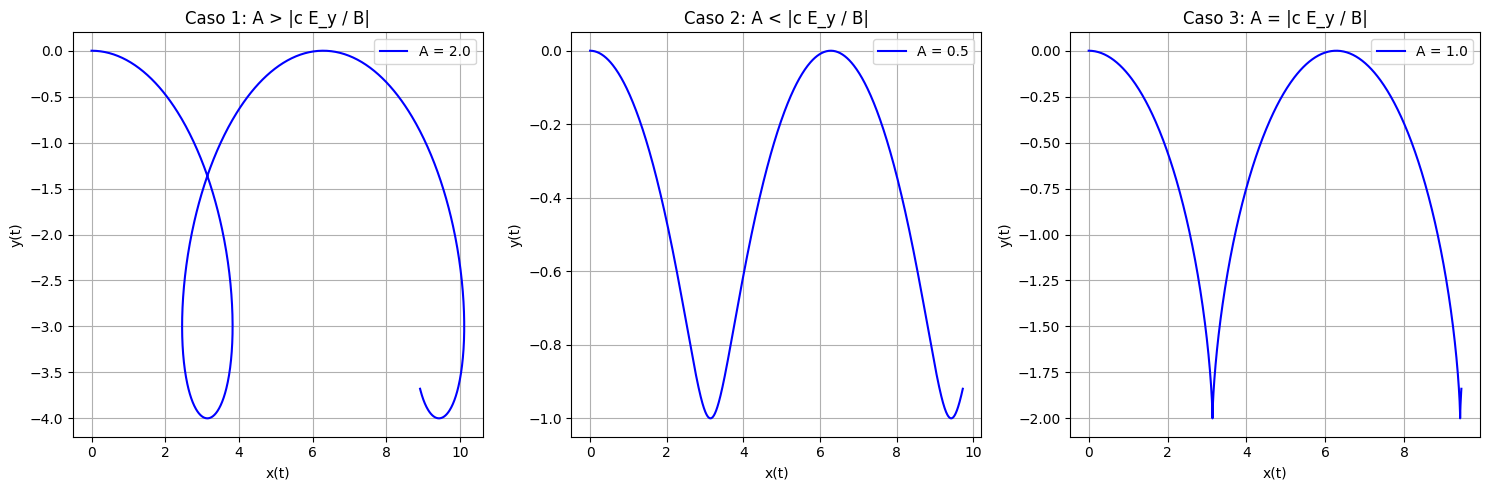

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
omega_c = 1.0  # Frecuencia ciclotrón
c_Ey_over_B = 1.0  # c E_y / B
A_values = [2.0, 0.5, 1.0]  # Valores de A para los tres casos
t = np.linspace(0, 10, 1000)  # Rango de tiempo

# Función para calcular x(t) y y(t)
def parametric_equations(A, t):
    x = (A / omega_c) * np.sin(omega_c * t) + (c_Ey_over_B) * t
    y = (A / omega_c) * (np.cos(omega_c * t) - 1)
    return x, y

# Graficar para cada caso
plt.figure(figsize=(15, 5))
for i, A in enumerate(A_values):
    x, y = parametric_equations(A, t)
    plt.subplot(1, 3, i+1)
    plt.plot(x, y, label=f'A = {A}', color='blue')
    plt.title(f'Caso {i+1}: A {"=" if A == c_Ey_over_B else ">" if A > c_Ey_over_B else "<"} |c E_y / B|')
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Tercer Punto

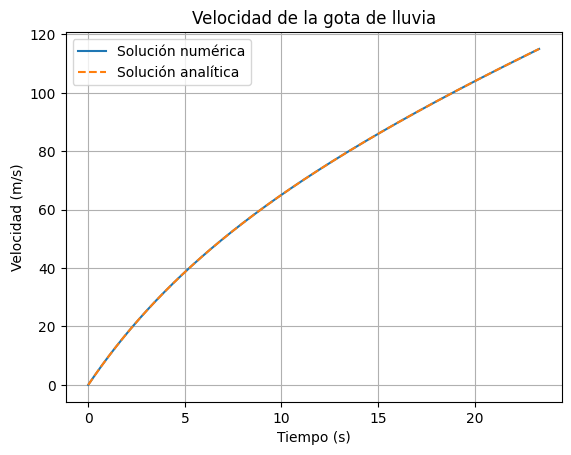

Velocidad final numérica: 115.0220805 m/s
Velocidad final analítica: 115.0228661 m/s
Velocidad límite después de salir de la nube: 171.67 m/s


In [99]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parámetros aleatorios
m0 = 0.7  # masa inicial en gramos
b = 0.03  # tasa de ganancia de masa en g/s
k = 0.08  # constante de resistencia en g/s
a = 0.8   # espesor de la nube en metros
g = 9.81  # aceleración debida a la gravedad en m/s^2


# Tiempo para duplicar la masa
t_final = m0 / b

# Ecuación diferencial
def dvdt(t, v):
    m = m0 + b * t
    return (m * g - k * v) / m

# Condición inicial
v0 = [0]

# Solución numérica
sol = solve_ivp(dvdt, [0, t_final], v0, t_eval=np.linspace(0, t_final, 1000))

# Solución analítica corregida
def v_analitico(t):
    m = m0 + b * t
    return (g * m / (b + k)) * (1 - (m0 / m)**((b + k) / b))

# Tiempos para la solución analítica
t_analitico = np.linspace(0, t_final, 1000)
v_analitico_vals = v_analitico(t_analitico)

# Graficar resultados
plt.plot(sol.t, sol.y[0], label='Solución numérica')
plt.plot(t_analitico, v_analitico_vals, '--', label='Solución analítica')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidad de la gota de lluvia')
plt.legend()
plt.grid()
plt.show()

# Velocidad al salir de la nube
v_final_numerico = sol.y[0][-1]
v_final_analitico = v_analitico(t_final)

print(f"Velocidad final numérica: {v_final_numerico:.7f} m/s")
print(f"Velocidad final analítica: {v_final_analitico:.7f} m/s")

# Velocidad límite después de salir de la nube
v_limite = (2 * m0 * g) / k
print(f"Velocidad límite después de salir de la nube: {v_limite:.2f} m/s")